<a href="https://colab.research.google.com/github/arddhanaza/foodprint-bangkit-capstone/blob/machine_learning/Capstone_Model_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import needed library

import tensorflow as tf
print("TensorFlow version : ", tf.__version__)
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TensorFlow version :  2.5.0


In [2]:
# extract the dataset

import os
import zipfile

local_zip = '/tmp/ind_data_split.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
# create directories

base_dir = '/tmp/ind_data_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
# data preprocessing

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

test_generator = validation_datagen.flow_from_directory(
	test_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

Found 1789 images belonging to 8 classes.
Found 221 images belonging to 8 classes.
Found 229 images belonging to 8 classes.


In [5]:
# create the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

In [6]:
# compile model

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=50,
                    validation_data=validation_generator,
                    verbose=1,
                    validation_steps=5)

Epoch 1/100
50/50 [==============================] - 42s 201ms/step - loss: 1.9904 - accuracy: 0.1972 - val_loss: 1.8803 - val_accuracy: 0.2062
Epoch 2/100
50/50 [==============================] - 9s 185ms/step - loss: 1.8501 - accuracy: 0.2605 - val_loss: 1.7138 - val_accuracy: 0.3250
Epoch 3/100
50/50 [==============================] - 9s 186ms/step - loss: 1.7811 - accuracy: 0.3143 - val_loss: 1.6869 - val_accuracy: 0.3688
Epoch 4/100
50/50 [==============================] - 9s 189ms/step - loss: 1.7157 - accuracy: 0.3506 - val_loss: 1.5756 - val_accuracy: 0.3875
Epoch 5/100
50/50 [==============================] - 9s 185ms/step - loss: 1.6778 - accuracy: 0.3600 - val_loss: 1.6505 - val_accuracy: 0.3375
Epoch 6/100
50/50 [==============================] - 9s 185ms/step - loss: 1.6365 - accuracy: 0.4001 - val_loss: 1.5832 - val_accuracy: 0.3688
Epoch 7/100
50/50 [==============================] - 9s 186ms/step - loss: 1.5965 - accuracy: 0.4076 - val_loss: 1.4964 - val_accuracy: 0.418

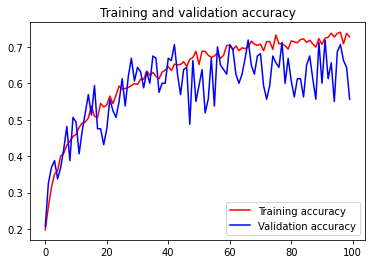

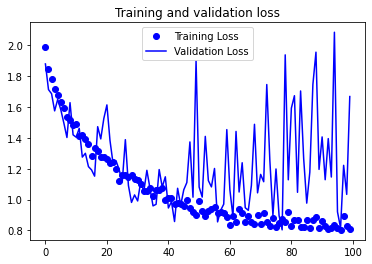

In [7]:
# show the graphs

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [8]:
# test by upload an image

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 2020-12-07-15-53-58-343.jpg to 2020-12-07-15-53-58-343.jpg
2020-12-07-15-53-58-343.jpg
[[0. 1. 0. 0. 0. 0. 0. 0.]]


In [9]:
# export the model

ind_food_saved_model = "ind_food_saved_model"
tf.saved_model.save(model, ind_food_saved_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: ind_food_saved_model/assets


In [10]:
%%bash -s $ind_food_saved_model
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['conv2d_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 150, 150, 3)
      name: serving_default_conv2d_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 8)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [11]:
# load the model

loaded = tf.saved_model.load(ind_food_saved_model)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 8), dtype=tf.float32, name='dense_1')}


In [12]:
# convert to tflite

converter = tf.lite.TFLiteConverter.from_saved_model(ind_food_saved_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

tflite_model_file = 'converted_ind_food_model.tflite'
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [13]:
# download the tflite asset

from google.colab import files
files.download('converted_ind_food_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>